In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install lazypredict

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm

import lazypredict
from lazypredict.Supervised import LazyClassifier

sns.set(rc={'figure.figsize':(8,6)})

In [4]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = data.drop('customer_id',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: >

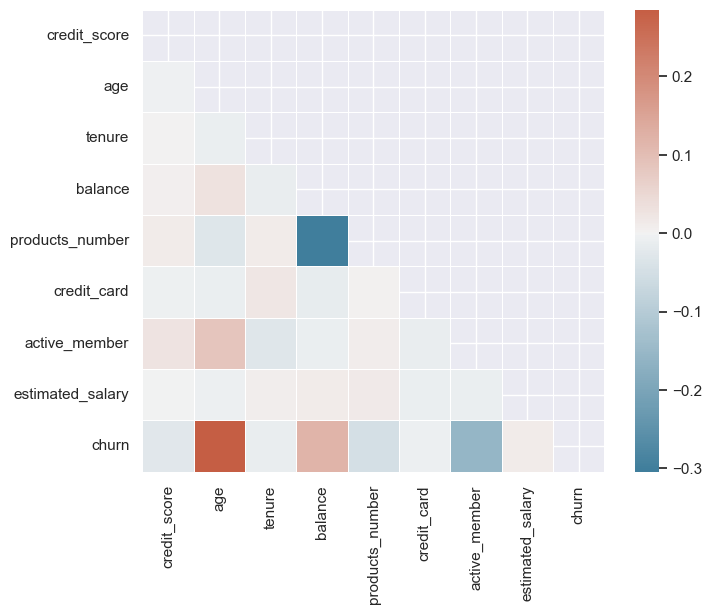

In [7]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [8]:
df = pd.get_dummies(df, columns = ['gender','country'])
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [9]:
X = df.copy();
X.drop('churn',axis = 1,inplace = True)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
model_list = ['Knn','Random Forest','Logistic Regression','Naive Bayes','Decision Tree','Support Vector Machine']

In [11]:
model_list

['Knn',
 'Random Forest',
 'Logistic Regression',
 'Naive Bayes',
 'Decision Tree',
 'Support Vector Machine']

In [12]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

In [13]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

##  KNN Classifier

In [14]:
KnnCL= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )  
KnnCL.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=2)

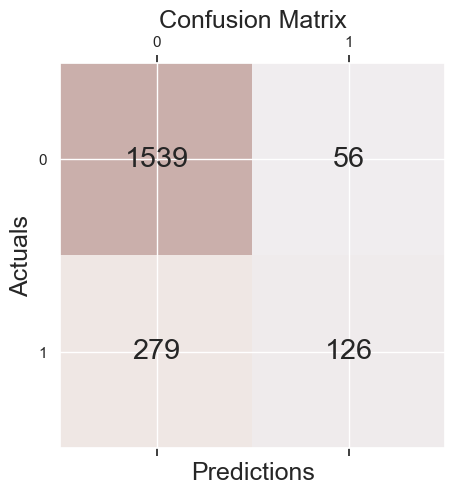

In [15]:
y_pred = KnnCL.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.833
Precision: 0.692
Recall: 0.311
F1 Score: 0.429
roc-auc score: 0.638


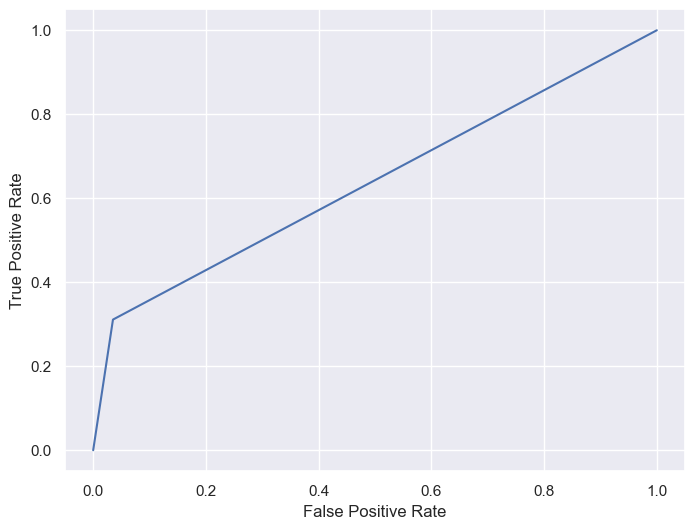

In [16]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
precision_list.append(precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_list.append(recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
f1_list.append(f1_score(y_test, y_pred))
print('roc-auc score: %.3f' % roc_auc_score(y_test, y_pred))
auc_list.append(roc_auc_score(y_test, y_pred))

plot_roc_curve(y_test, y_pred)

## Random Forest Classifier 

In [17]:
rFclf = RandomForestClassifier(max_depth=3, random_state=0)
rFclf.fit(X, y)

RandomForestClassifier(max_depth=3, random_state=0)

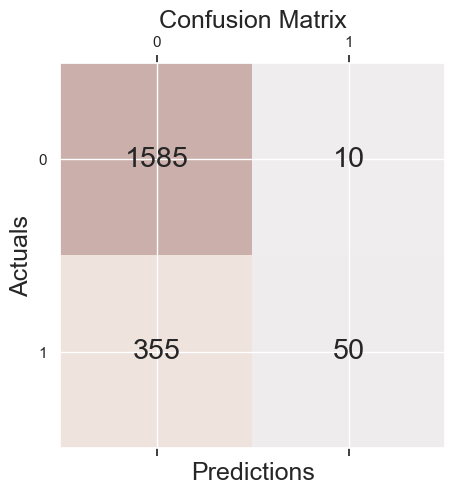

In [18]:
y_pred = rFclf.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.818
Precision: 0.833
Recall: 0.123
F1 Score: 0.215
roc-auc score: 0.559


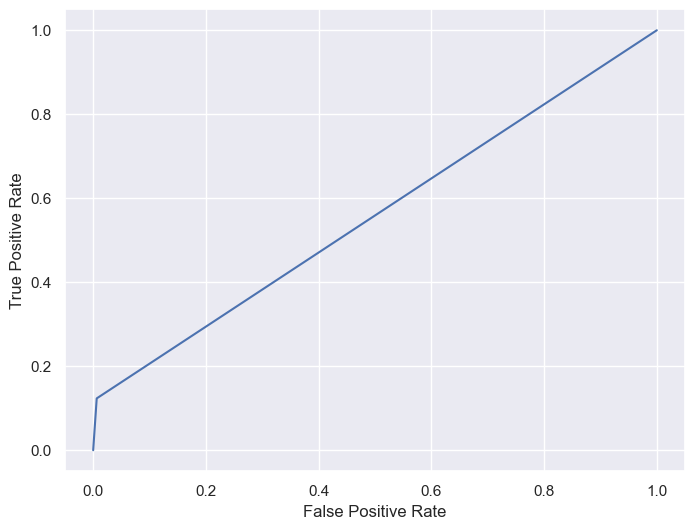

In [19]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
precision_list.append(precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_list.append(recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
f1_list.append(f1_score(y_test, y_pred))
print('roc-auc score: %.3f' % roc_auc_score(y_test, y_pred))
auc_list.append(roc_auc_score(y_test, y_pred))

plot_roc_curve(y_test, y_pred)

### Logistic Regression

In [20]:
lRclf = LogisticRegression(random_state=0).fit(X, y)

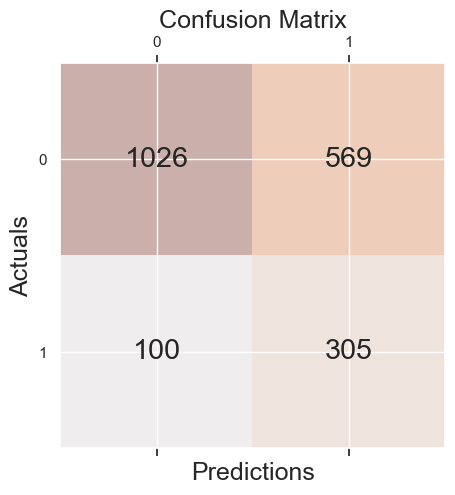

In [21]:
y_pred = lRclf.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.665
Precision: 0.349
Recall: 0.753
F1 Score: 0.477
roc-auc score: 0.698


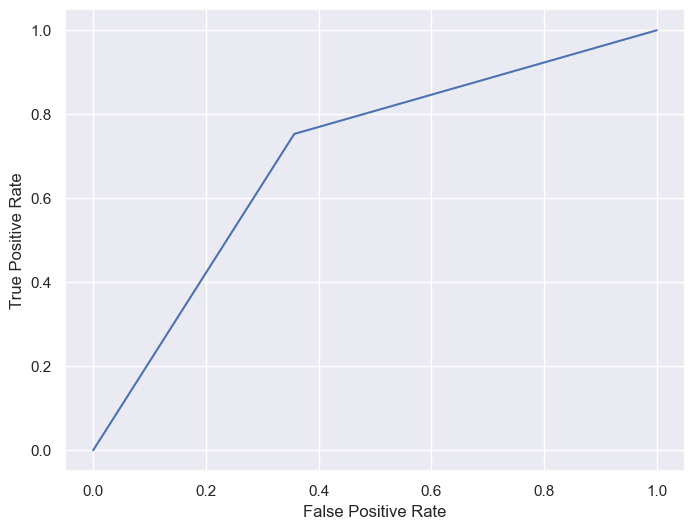

In [22]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
precision_list.append(precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_list.append(recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
f1_list.append(f1_score(y_test, y_pred))
print('roc-auc score: %.3f' % roc_auc_score(y_test, y_pred))
auc_list.append(roc_auc_score(y_test, y_pred))

plot_roc_curve(y_test, y_pred)

### Naive Bayes 

In [23]:
nBclf = MultinomialNB()
nBclf.fit(X, y)

MultinomialNB()

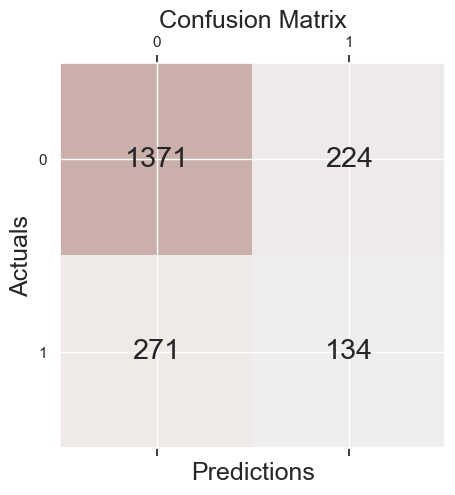

In [24]:
y_pred = nBclf.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.752
Precision: 0.374
Recall: 0.331
F1 Score: 0.351
roc-auc score: 0.595


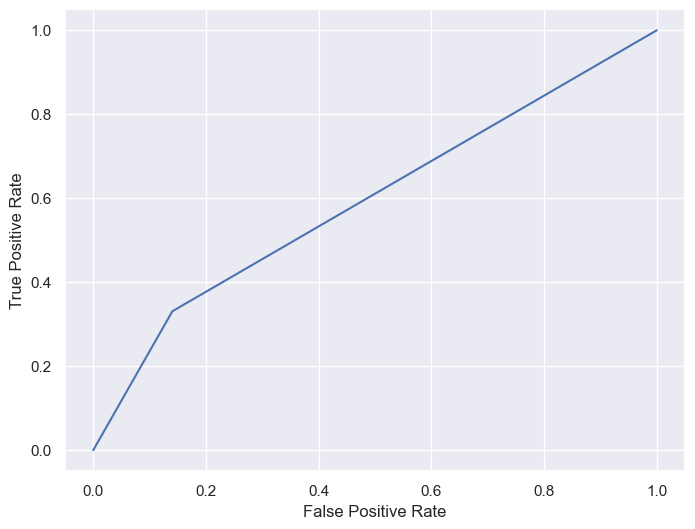

In [25]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
precision_list.append(precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_list.append(recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
f1_list.append(f1_score(y_test, y_pred))
print('roc-auc score: %.3f' % roc_auc_score(y_test, y_pred))
auc_list.append(roc_auc_score(y_test, y_pred))

plot_roc_curve(y_test, y_pred)

### Decision tree Classifier 

In [26]:
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=0)

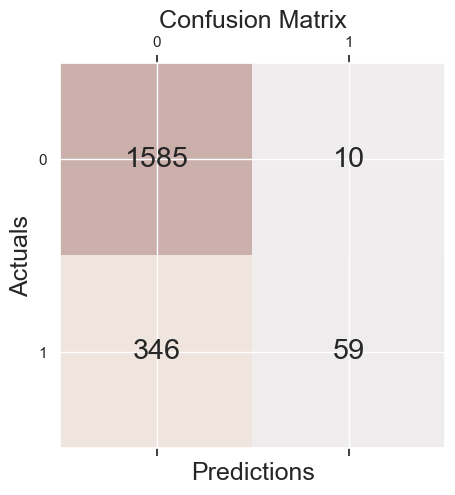

In [27]:
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.822
Precision: 0.855
Recall: 0.146
F1 Score: 0.249
roc-auc score: 0.570


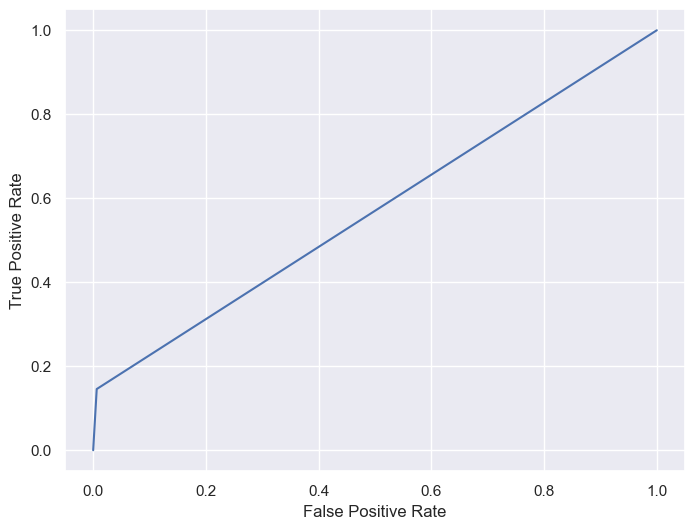

In [28]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
precision_list.append(precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_list.append(recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
f1_list.append(f1_score(y_test, y_pred))
print('roc-auc score: %.3f' % roc_auc_score(y_test, y_pred))
auc_list.append(roc_auc_score(y_test, y_pred))

plot_roc_curve(y_test, y_pred)

### Support Vector Machine

In [29]:
svCL = svm.LinearSVC()
svCL.fit(X, y)

LinearSVC()

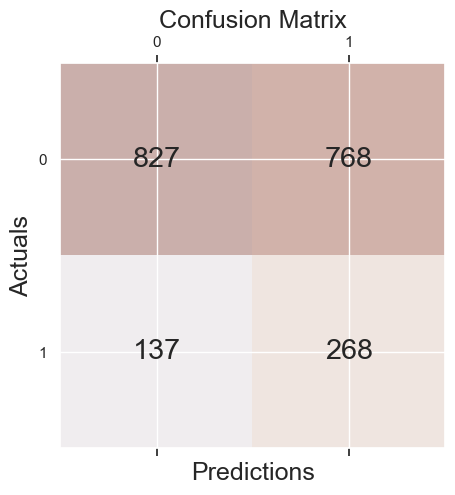

In [30]:
y_pred = svCL.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.547
Precision: 0.259
Recall: 0.662
F1 Score: 0.372
roc-auc score: 0.590


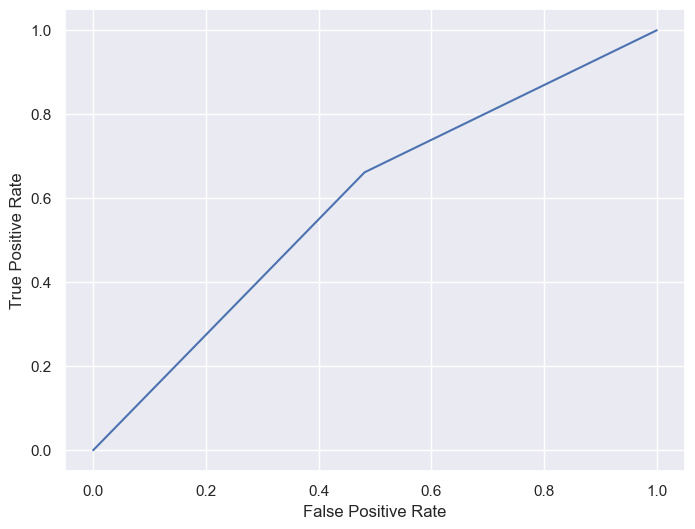

In [31]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
precision_list.append(precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_list.append(recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
f1_list.append(f1_score(y_test, y_pred))
print('roc-auc score: %.3f' % roc_auc_score(y_test, y_pred))
auc_list.append(roc_auc_score(y_test, y_pred))

plot_roc_curve(y_test, y_pred)

## Here are the comparisons of the scores for each Classifier

# This is the comparison of Accuracy for each classifier

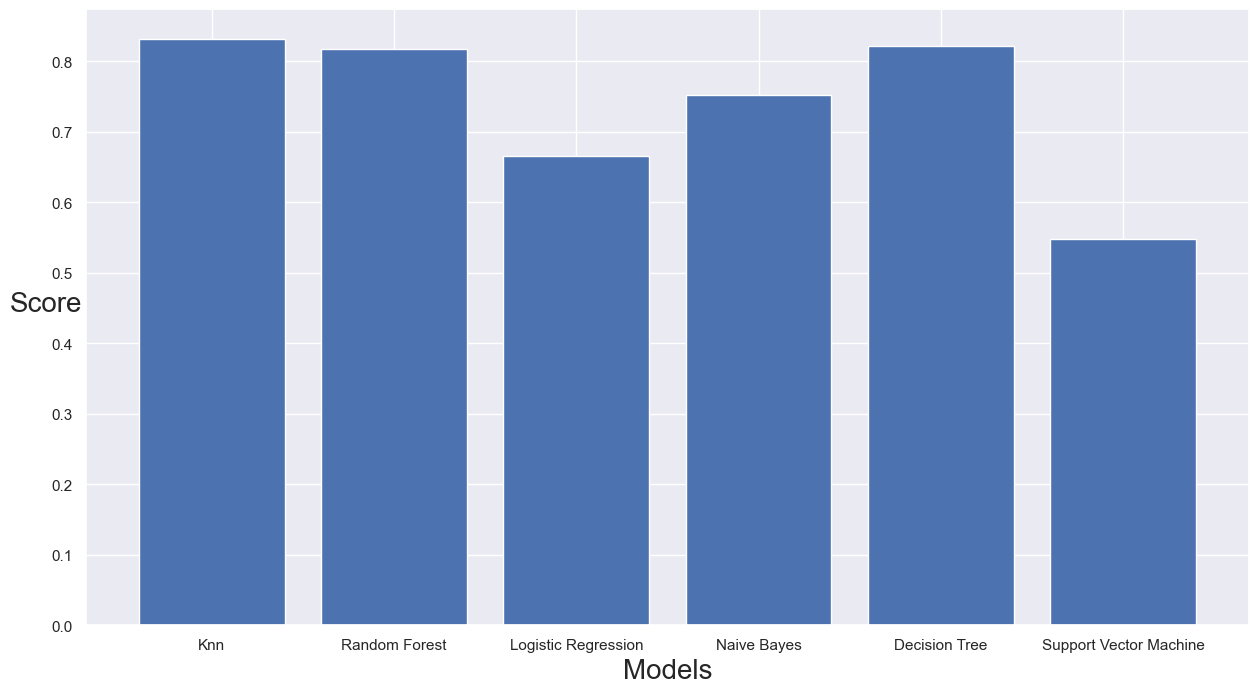

In [32]:
plt.figure(figsize=(15, 8))
plt.bar(model_list, accuracy_list)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Score', fontsize=20, rotation=0)
plt.show()

# This is the comparison of Precision for each classifier

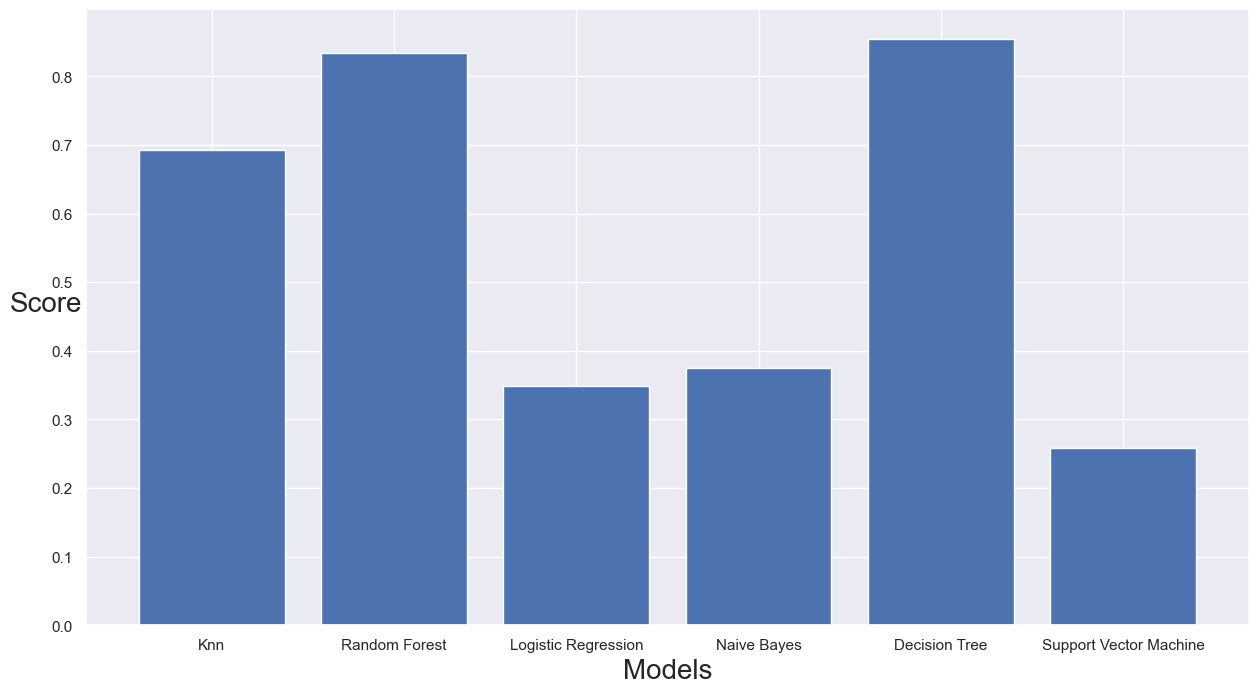

In [33]:
plt.figure(figsize=(15, 8))
plt.bar(model_list, precision_list)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Score', fontsize=20, rotation=0)
plt.show()

# This is the comparison of Recall for each classifier

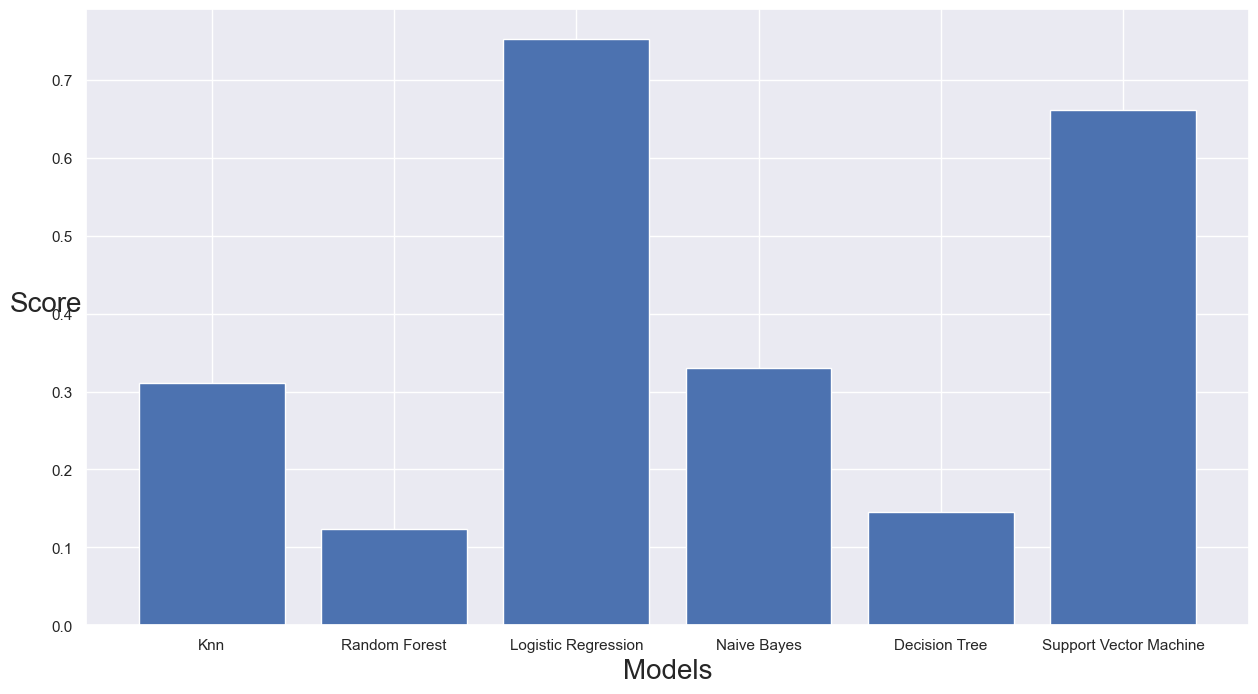

In [34]:
plt.figure(figsize=(15, 8))
plt.bar(model_list, recall_list)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Score', fontsize=20, rotation=0)
plt.show()

# This is the comparison of f1 for each classifier

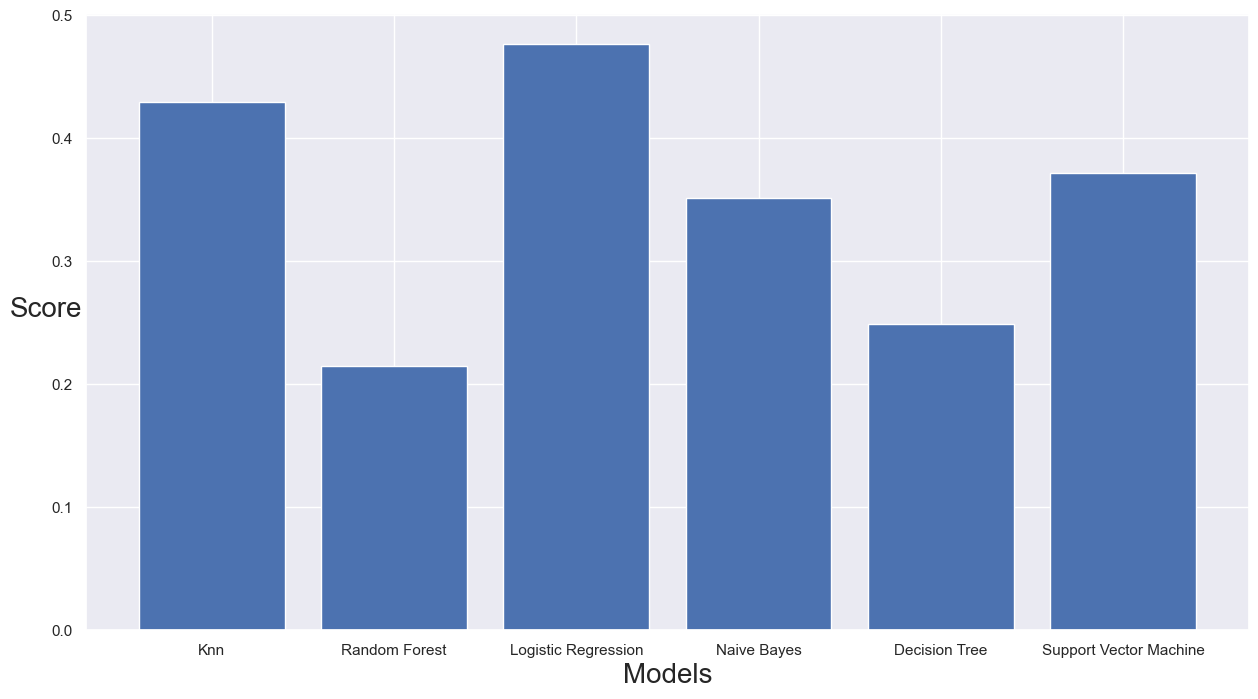

In [35]:
plt.figure(figsize=(15, 8))
plt.bar(model_list, f1_list)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Score', fontsize=20, rotation=0)
plt.show()

# This is the comparison of auc for each classifier

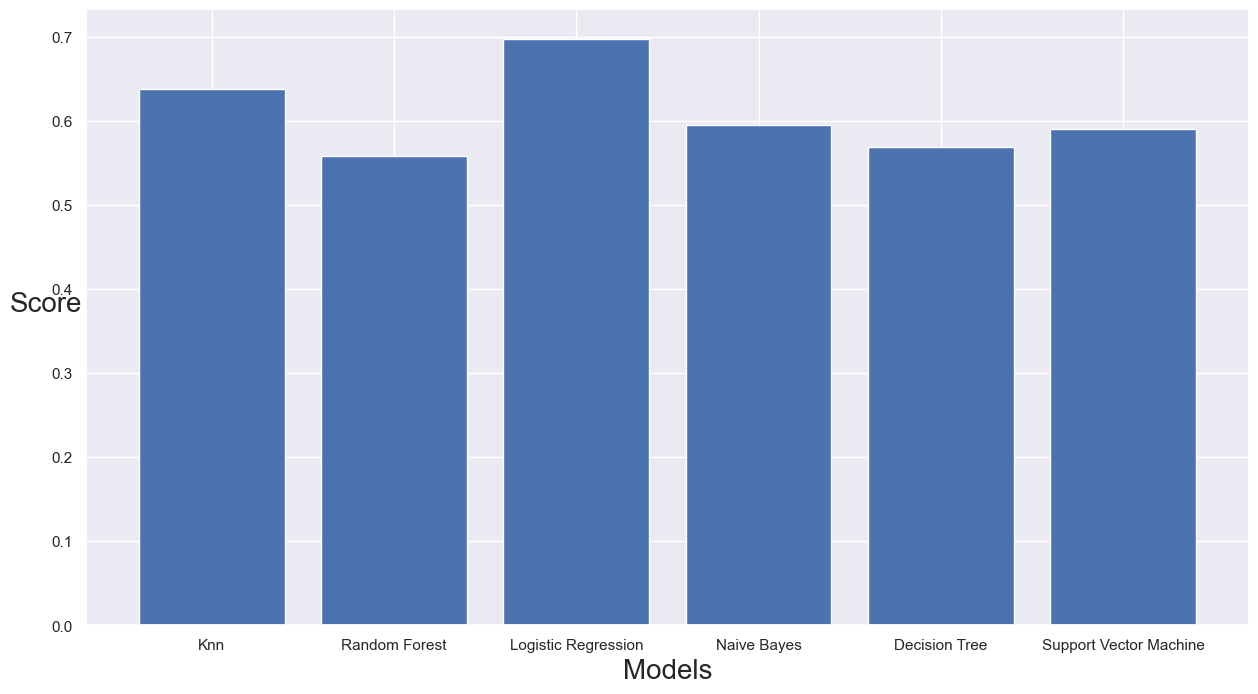

In [36]:
plt.figure(figsize=(15, 8))
plt.bar(model_list, auc_list)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Score', fontsize=20, rotation=0)
plt.show()

## We can also use a lazy classifier like this to instantly get a comparison of all the different models. But we chose to add this just as a bonus. 

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model'})

line.show()